##**EDA**

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
import numpy as np
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('/home/joud/code/parvxi/Peaklytics/raw_data/Peaklytics_intial_data.csv')
df.head()

,Unnamed: 0,name,market,funding_total_usd,status,region,city,funding_rounds,founded_at,founded_month,...,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,country,quater
0,0,#waywire,News,1750000.0,acquired,New York City,New York,1.0,2012-06-01,2012-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,United States,Q2
1,2,'Rock' Your Paper,Publishing,40000.0,operating,Tallinn,Tallinn,1.0,2012-10-26,2012-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Estonia,Q4
2,3,(In)Touch Network,Electronics,1500000.0,operating,London,London,1.0,2011-04-01,2011-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,United Kingdom,Q2
3,4,-R- Ranch and Mine,Tourism,60000.0,operating,Dallas,Fort Worth,2.0,2014-01-01,2014-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,United States,Q1
4,10,"1,2,3 Listo",E-Commerce,40000.0,operating,Santiago,Las Condes,1.0,2012-01-01,2012-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chile,Q1


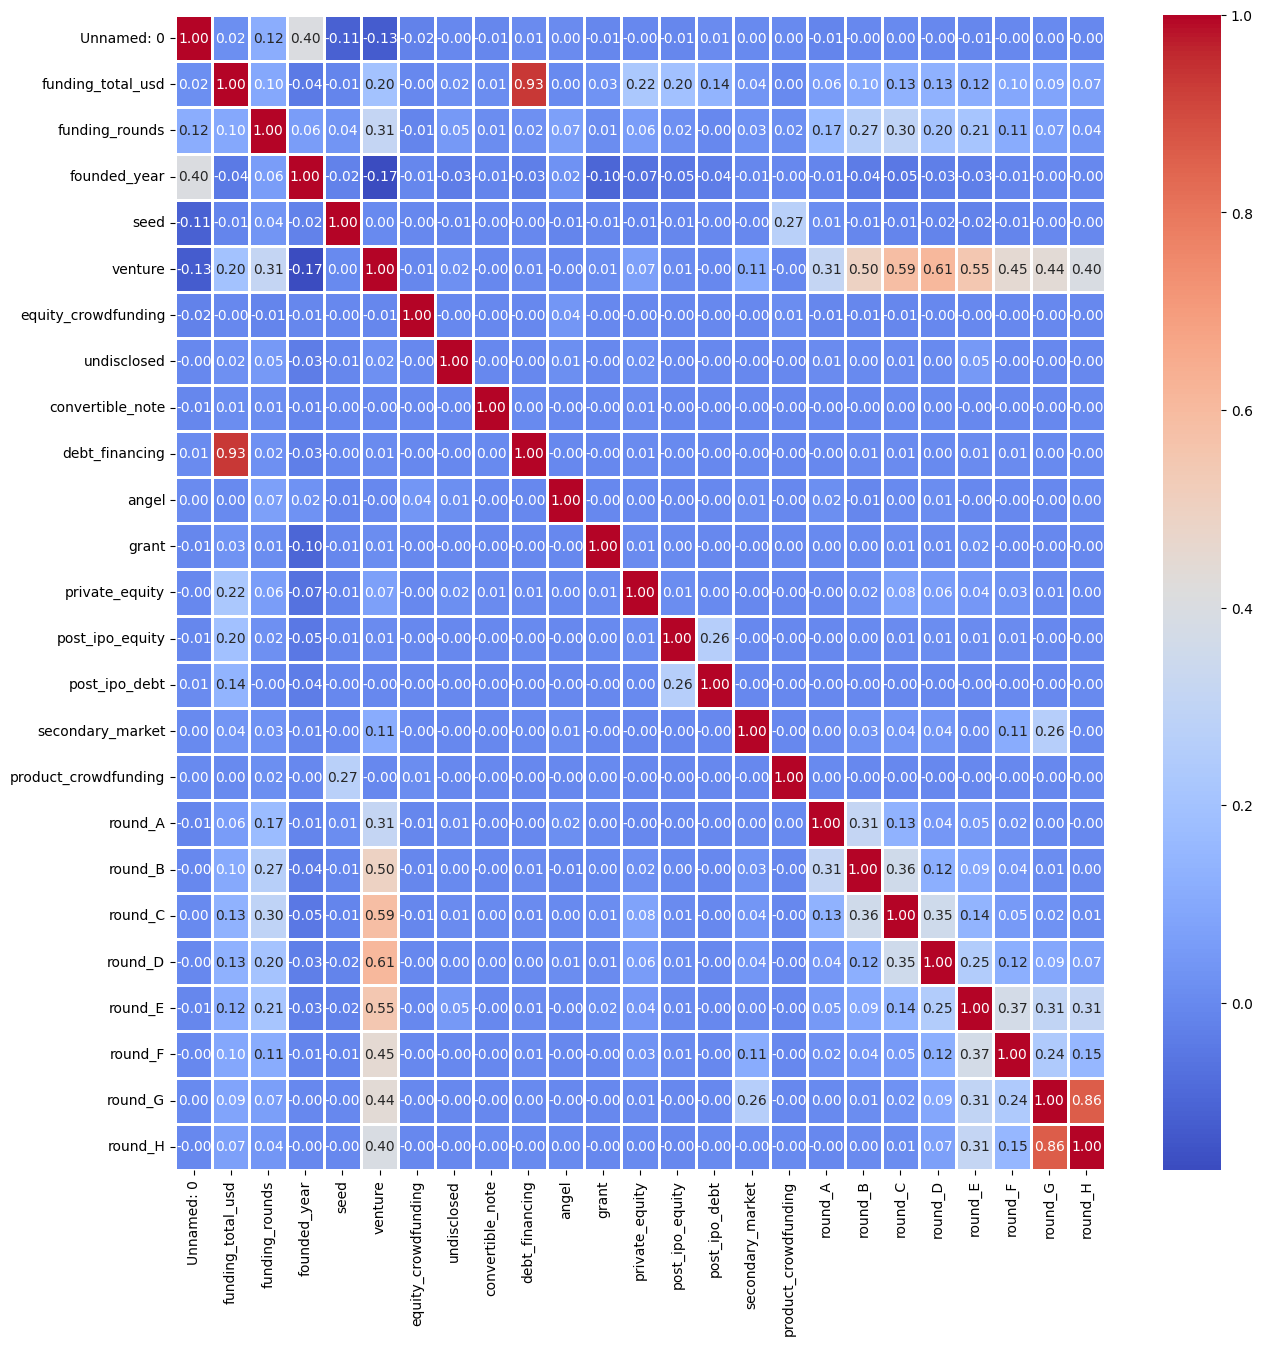

In [3]:
numerical_columns = df.select_dtypes(include=['number']).columns

corr_matrix = df[numerical_columns].corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.8, fmt='.2f', ax=ax)
plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43268 entries, 0 to 43267
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            43268 non-null  int64  
 1   name                  43268 non-null  object 
 2   market                43268 non-null  object 
 3   funding_total_usd     43268 non-null  float64
 4   status                43268 non-null  object 
 5   region                43268 non-null  object 
 6   city                  43268 non-null  object 
 7   funding_rounds        43268 non-null  float64
 8   founded_at            43268 non-null  object 
 9   founded_month         43268 non-null  object 
 10  founded_quarter       43268 non-null  object 
 11  founded_year          43268 non-null  float64
 12  first_funding_at      43268 non-null  object 
 13  last_funding_at       43268 non-null  object 
 14  seed                  43268 non-null  float64
 15  venture            

In [5]:
df.isnull().sum()

Unnamed: 0                  0
name                        0
market                      0
funding_total_usd           0
status                      0
region                      0
city                        0
funding_rounds              0
founded_at                  0
founded_month               0
founded_quarter             0
founded_year                0
first_funding_at            0
last_funding_at             0
seed                        0
venture                     0
equity_crowdfunding         0
undisclosed             15298
convertible_note        15298
debt_financing          15298
angel                   15298
grant                   15298
private_equity          15298
post_ipo_equity         15298
post_ipo_debt           15298
secondary_market        15298
product_crowdfunding    15298
round_A                 15298
round_B                 15298
round_C                 15298
round_D                 15298
round_E                 15298
round_F                 15298
round_G   

In [6]:
df['status'].value_counts(normalize=True)

status
operating    0.555561
acquired     0.222220
closed       0.222220
Name: proportion, dtype: float64

In [7]:
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], errors='coerce')
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], errors='coerce')
df['founded_at'] = pd.to_datetime(df['founded_at'],  errors='coerce')

###Feature Engineering

In [8]:
df['funding_category'] = df.apply(
    lambda x: 'Single Round - Traditional' if x['funding_rounds'] == 1 and x[['seed', 'venture']].sum() == 0
    else 'Single Round - Non-traditional' if x['funding_rounds'] == 1 and x[['seed', 'venture']].sum() > 0
    else 'Multiple Rounds', axis=1
)

In [9]:
current_year = datetime.now().year
df['company_age'] = current_year - df['founded_at'].dt.year

Remove unnecessary features for Peaklytics, as well as features that have high correlation with others.

In [10]:
df.drop(columns=['Unnamed: 0','round_G', 'round_H', 'founded_quarter', 'quater', 'founded_month', 'name', 'founded_year', 'founded_at', 'debt_financing', 'first_funding_at',	'last_funding_at'], inplace=True)

In [11]:

df['status']  = df['status'].apply(lambda x: 'operating' if x == 'acquired' else x)


In [ ]:
df['status'].value_counts()

status
operating    33653
closed        9615
Name: count, dtype: int64

Save the cleaned data to a new csv file

In [13]:
df.to_csv('cleaned_peaklytics_data.csv', index=False)

# Preprocessing

In [14]:
cleaned_df = pd.read_csv('/home/joud/code/parvxi/Peaklytics/notebooks/cleaned_peaklytics_data.csv')

In [15]:
cleaned_df.head()

,market,funding_total_usd,status,region,city,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,...,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,country,funding_category,company_age
0,News,1750000.0,operating,New York City,New York,1.0,1750000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,United States,Single Round - Non-traditional,12
1,Publishing,40000.0,operating,Tallinn,Tallinn,1.0,40000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Estonia,Single Round - Non-traditional,12
2,Electronics,1500000.0,operating,London,London,1.0,1500000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,United Kingdom,Single Round - Non-traditional,13
3,Tourism,60000.0,operating,Dallas,Fort Worth,2.0,0.0,0.0,60000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,United States,Multiple Rounds,10
4,E-Commerce,40000.0,operating,Santiago,Las Condes,1.0,40000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chile,Single Round - Non-traditional,12


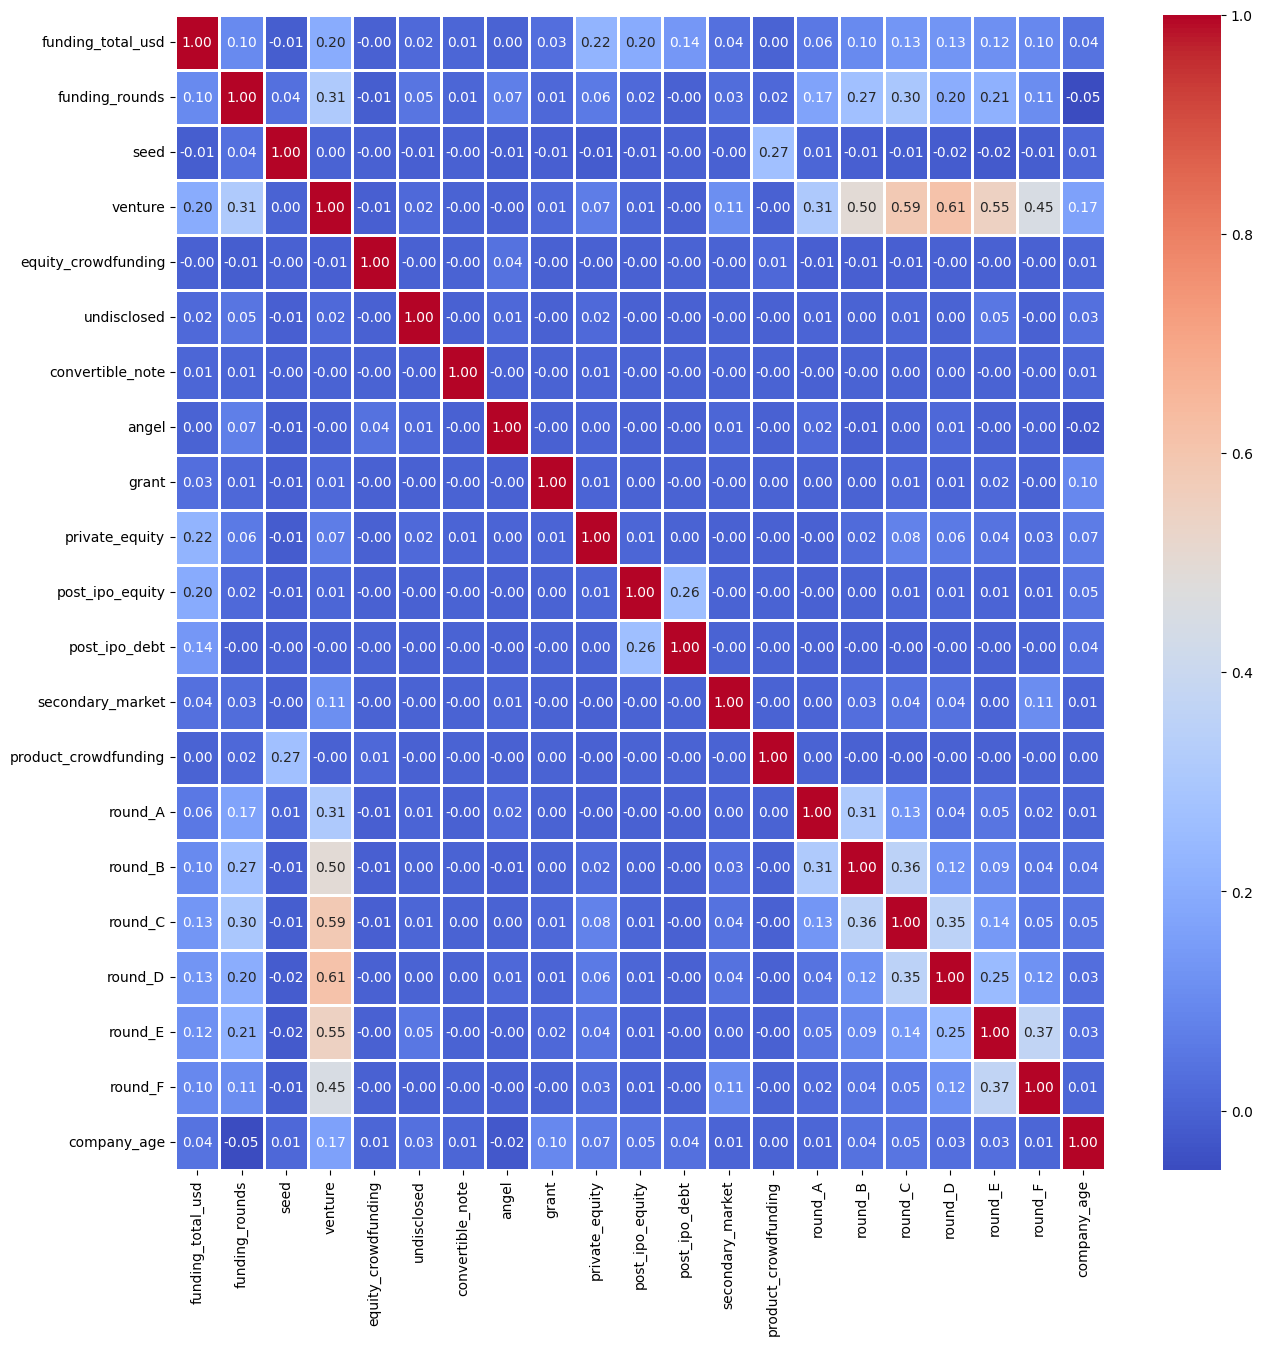

In [16]:
numerical_columns = cleaned_df.select_dtypes(include=['number']).columns

corr_matrix = cleaned_df[numerical_columns].corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.8, fmt='.2f', ax=ax)
plt.show()

## Removing outliers, scaling, encoding, and imputing

In [17]:
numerical_columns = cleaned_df.select_dtypes(include=['number']).columns
numerical_columns

Index(['funding_total_usd', 'funding_rounds', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note', 'angel',
       'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'company_age'],
      dtype='object')

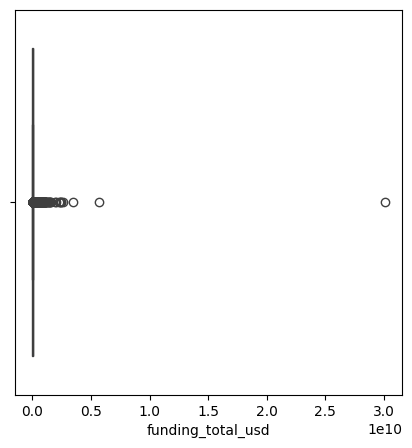

In [18]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(x='funding_total_usd', data=cleaned_df, ax=ax)
plt.show()

In [19]:
# https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

Q1 = cleaned_df['funding_total_usd'].quantile(0.25)
Q3 = cleaned_df['funding_total_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1 * IQR #1.25
upper_bound = Q3 + 1 * IQR


cleaned_df = df[(df['funding_total_usd'] >= lower_bound) & (df['funding_total_usd'] <= upper_bound)]


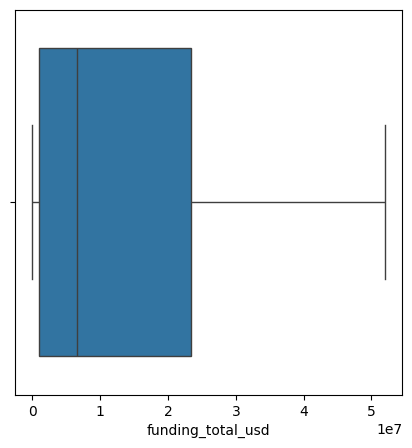

In [20]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(x='funding_total_usd', data=cleaned_df, ax=ax)
plt.show()

In [21]:
duplicates_before = cleaned_df.duplicated().sum()
print(duplicates_before)
cleaned_df.drop_duplicates(inplace=True)

58


/tmp/ipykernel_21991/372861287.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop_duplicates(inplace=True)


In [22]:
duplicates_after = cleaned_df.duplicated().sum()
print(duplicates_after)

0


In [23]:
cleaned_df[['market', 'country', 'funding_category', 'city', 'region']].nunique()

market               699
country              104
funding_category       3
city                2885
region               877
dtype: int64

In [24]:

cleaned_df = pd.get_dummies(cleaned_df, columns=['funding_category', 'country'], drop_first=True)
cleaned_df.head()

,market,funding_total_usd,status,region,city,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,...,country_Tunisia,country_Turkey,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Viet Nam
0,News,1750000.0,operating,New York City,New York,1.0,1750000.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
1,Publishing,40000.0,operating,Tallinn,Tallinn,1.0,40000.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,Electronics,1500000.0,operating,London,London,1.0,1500000.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,False
3,Tourism,60000.0,operating,Dallas,Fort Worth,2.0,0.0,0.0,60000.0,0.0,...,False,False,False,False,False,False,True,False,False,False
4,E-Commerce,40000.0,operating,Santiago,Las Condes,1.0,40000.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [25]:
market_freq = cleaned_df['market'].value_counts(normalize=True)
cleaned_df['market_freq'] = cleaned_df['market'].map(market_freq)

city_freq = cleaned_df['city'].value_counts(normalize=True)
cleaned_df['city_freq'] = cleaned_df['city'].map(city_freq)

region_freq = cleaned_df['region'].value_counts(normalize=True)
cleaned_df['region_freq'] = cleaned_df['region'].map(region_freq)

cleaned_df = cleaned_df.drop(columns=['market', 'city', 'region'])
cleaned_df.head()

,funding_total_usd,status,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,angel,grant,...,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Viet Nam,market_freq,city_freq,region_freq
0,1750000.0,operating,1.0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,True,False,False,False,0.004692,0.039132,0.043026
1,40000.0,operating,1.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,0.001113,0.000629,0.000629
2,1500000.0,operating,1.0,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,0.000484,0.020364,0.024863
3,60000.0,operating,2.0,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,...,False,False,False,True,False,False,False,0.000314,0.000266,0.006288
4,40000.0,operating,1.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,0.022323,0.000048,0.002878


In [26]:
cleaned_df.shape

(41347, 130)

In [ ]:
cleaned_df['status'].value_counts()

status
operating    31768
closed        9579
Name: count, dtype: int64

In [28]:
le = LabelEncoder()
cleaned_df['status'] = le.fit_transform(cleaned_df['status'])

In [29]:
cleaned_df.shape

(41347, 130)

In [30]:
scaler = StandardScaler()
cleaned_df['funding_total_usd'] = scaler.fit_transform(cleaned_df[['funding_total_usd']])
cleaned_df.head()

,funding_total_usd,status,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,angel,grant,...,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Viet Nam,market_freq,city_freq,region_freq
0,-0.782894,1,1.0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,True,False,False,False,0.004692,0.039132,0.043026
1,-0.897905,1,1.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,0.001113,0.000629,0.000629
2,-0.799709,1,1.0,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,0.000484,0.020364,0.024863
3,-0.896560,1,2.0,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,...,False,False,False,True,False,False,False,0.000314,0.000266,0.006288
4,-0.897905,1,1.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,0.022323,0.000048,0.002878


In [ ]:
cleaned_df['funding_total_usd'].isnull().sum()

np.int64(0)

In [32]:
cleaned_df['funding_total_usd'].fillna(cleaned_df['funding_total_usd'].median(), inplace=True)

/tmp/ipykernel_21991/3820946160.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_df['funding_total_usd'].fillna(cleaned_df['funding_total_usd'].median(), inplace=True)


In [33]:
cleaned_df['funding_total_usd'].isnull().sum()

np.int64(0)

In [34]:
cleaned_df.isnull().sum()
cleaned_df.dropna(inplace=True)

In [35]:
cleaned_df.isnull().sum()

funding_total_usd     0
status                0
funding_rounds        0
seed                  0
venture               0
                     ..
country_Uzbekistan    0
country_Viet Nam      0
market_freq           0
city_freq             0
region_freq           0
Length: 130, dtype: int64

In [36]:
cleaned_df.head()

,funding_total_usd,status,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,angel,grant,...,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Viet Nam,market_freq,city_freq,region_freq
0,-0.782894,1,1.0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,True,False,False,False,0.004692,0.039132,0.043026
1,-0.897905,1,1.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,0.001113,0.000629,0.000629
2,-0.799709,1,1.0,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,0.000484,0.020364,0.024863
3,-0.896560,1,2.0,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,...,False,False,False,True,False,False,False,0.000314,0.000266,0.006288
4,-0.897905,1,1.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,0.022323,0.000048,0.002878


In [37]:
cleaned_df.dtypes

funding_total_usd     float64
status                  int64
funding_rounds        float64
seed                  float64
venture               float64
                       ...   
country_Uzbekistan       bool
country_Viet Nam         bool
market_freq           float64
city_freq             float64
region_freq           float64
Length: 130, dtype: object

In [38]:
today = pd.to_datetime('today')
# cleaned_df['funding_duration_days'] = (cleaned_df['last_funding_at'] - cleaned_df['first_funding_at']).dt.days
#cleaned_df['days_since_first_funding'] = (today - cleaned_df['first_funding_at']).dt.days
#cleaned_df['days_since_last_funding'] = (today - cleaned_df['last_funding_at']).dt.days
#cleaned_df.drop(columns=['first_funding_at', 'last_funding_at'], inplace=True)

In [39]:
X = cleaned_df.drop(columns=['status'])
y = cleaned_df['status']

In [40]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_resampled[numerical_columns] = scaler.fit_transform(X_train_resampled[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])


In [41]:
y_train_resampled.value_counts()

status
1    19709
0    19709
Name: count, dtype: int64

In [42]:

random=RandomForestClassifier(random_state=45)
random.fit(X_train_resampled,y_train_resampled)
y_pred=random.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy, 2)}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {round(recall, 3)}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {round(precision, 2)}")

f1 = f1_score(y_test, y_pred)
print(f"F1: {round(f1, 2)}")

y_pred_proba = random.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {round(roc_auc, 3)}")

Accuracy: 0.93
Recall: 0.979
Precision: 0.95
F1: 0.96
ROC-AUC: 0.702


In [44]:
xgb_model = XGBClassifier(random_state=45)
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred = xgb_model.predict(X_test)

KeyboardInterrupt: 

In [45]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy, 2)}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {round(recall, 3)}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {round(precision, 2)}")

f1 = f1_score(y_test, y_pred)
print(f"F1: {round(f1, 2)}")

y_pred_proba = random.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {round(roc_auc, 3)}")

Accuracy: 0.93
Recall: 0.98
Precision: 0.95
F1: 0.96
ROC-AUC: 0.702


In [46]:
X_train_resampled.columns = X_train_resampled.columns.str.replace(r'[^\w]', '_', regex=True)
X_test.columns = X_test.columns.str.replace(r'[^\w]', '_', regex=True)

In [ ]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(random_state=45)
lgbm_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = lgbm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy, 2)}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {round(recall, 3)}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {round(precision, 2)}")

f1 = f1_score(y_test, y_pred)
print(f"F1: {round(f1, 2)}")


y_pred_proba = random.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {round(roc_auc, 3)}")


[LightGBM] [Info] Number of positive: 19709, number of negative: 19709
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 7.950165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4207
[LightGBM] [Info] Number of data points in the train set: 39418, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
